In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:

#### Normalize the data before running tthrough k-means algorithm

df_std =pd.read_csv('liked_tracks_1650200513.csv')
scaler = MinMaxScaler()
cols_to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df_std[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df_std[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# >>> dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])

# clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
# model = clt.fit(X_std)

In [3]:
df_std.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,0.677009,0.593339,0.464314,0.787475,0.565996,0.188787,0.255681,0.062705,0.206413,0.445317,0.554052
std,0.177380,0.181354,0.335628,0.096849,0.495686,0.161161,0.270131,0.198965,0.160343,0.236209,0.137392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.560451,0.476329,0.090909,0.744966,0.000000,0.054822,0.038453,0.000000,0.104839,0.247706,0.443273
50%,0.698770,0.598955,0.454545,0.803271,1.000000,0.129979,0.146585,0.000003,0.137097,0.427115,0.556362
75%,0.811475,0.724595,0.727273,0.848837,1.000000,0.294549,0.400853,0.001071,0.264113,0.619011,0.649209
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
import seaborn as sns
from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

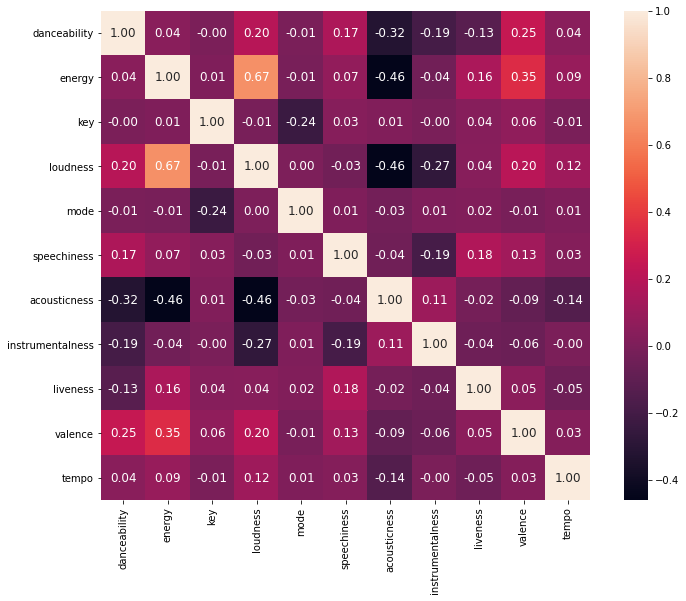

In [30]:
liked_songs = df_std.drop(columns=["cluster", "x_coords", "y_coords"])

corrmat = liked_songs.corr() #correlation matrix
f, ax = plt.subplots(figsize = (12,9))
hm = sns.heatmap(corrmat, cbar = True, annot = True, square = True,
                fmt = '.2f', annot_kws = {'size':12})
plt.show()


# k = 14
# cols = corrmat_train_spearman.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(df_std.values.T)
# sns.set(font_scale = 1.5)
# f, ax = plt.subplots(figsize = (12,9))
# hm = sns.heatmap(cm, cbar = True, annot = True, square = True,
#                 fmt = '.2f', annot_kws = {'size':12}, 
#                 yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

Not a lot of correlation across features, with a few exceptions: 
 - [Energy vs Loudness]: positive correlation, 0.67
 - [Loudness vs Acousticness]: negative correlation, -0.46
 - [Energy vs Acousticness]: negative correlation, -0.46

### K-Means on Scaled Data

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas import read_csv 

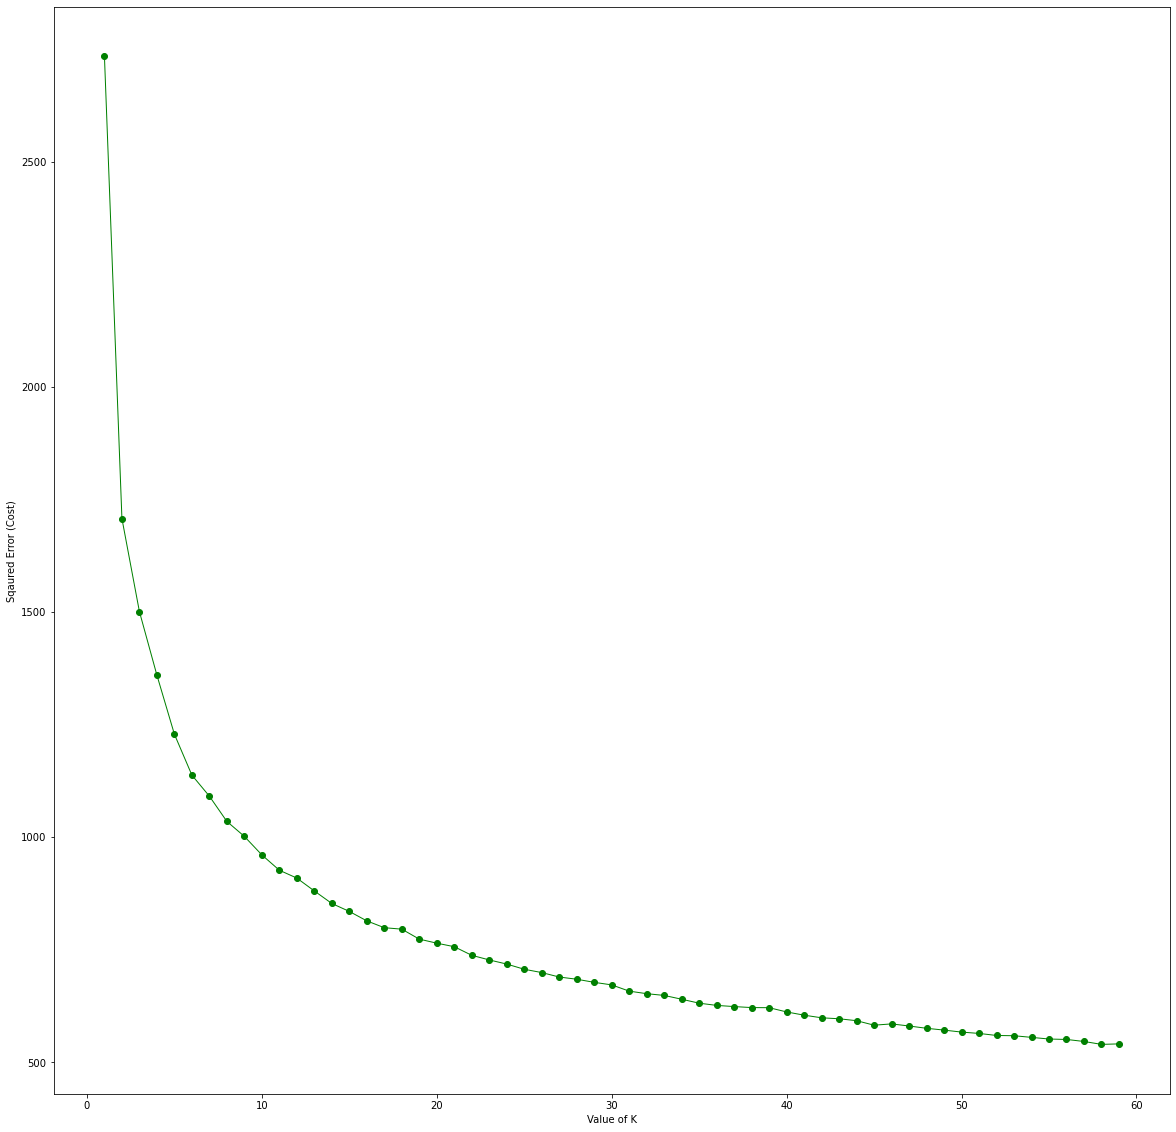

In [17]:
FEATURE_KEYS = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
K_MAX = 60


cost = list()
for i in range(1, K_MAX):
    KM = KMeans(n_clusters = i, init= "random",
                max_iter = 500, n_init=10)
    KM.fit(df_std[FEATURE_KEYS])
    cost.append(KM.inertia_)

plt.plot(range(1, K_MAX), cost, color ='g', linewidth ='1', marker='o')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.rcParams["figure.figsize"] = (15,3)
plt.show()

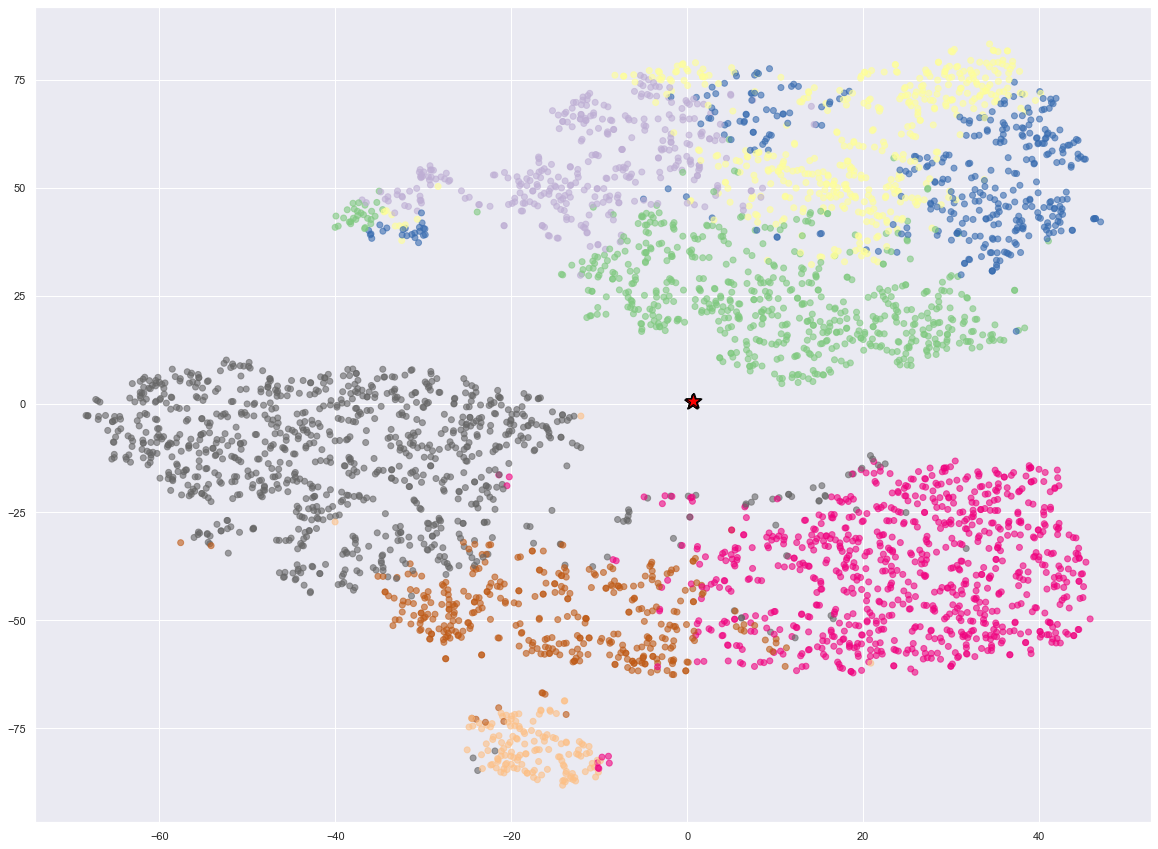

In [59]:
from sklearn.manifold import TSNE
import numpy as np

NUM_CLUSTERS = 8
TRACK_ADD_LIMIT = 100
#COLORS = ['#e52165', '#0d1137', '#077b8a', '#5c3c92', '#1b6535']
#COLOR_MAP = {0:COLORS[0], 1:COLORS[1], 2:COLORS[2], 3:COLORS[3], 4:COLORS[4]}
FEATURE_KEYS = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0, 
                init= "random", max_iter = 100, n_init=10)


df_std['cluster'] = kmeans.fit_predict(df_std[FEATURE_KEYS])
#df_std['color'] = df_std.cluster.map(COLOR_MAP)
centers = np.array(kmeans.cluster_centers_)


tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(df_std[FEATURE_KEYS].values)
df_std['x_coords'] = Y[:, 0]
df_std['y_coords'] = Y[:, 1]
plt.scatter(df_std.x_coords, df_std.y_coords, c= kmeans.labels_.astype(float), cmap = 'Accent', alpha = 0.6)
plt.scatter(
    centers[:, 0], centers[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.rcParams["figure.figsize"] = (20,15)

plt.show()

# axes.scatter(data[:,0], data[:,1], c=labels, cmap = 'Accent', s=10)



In [60]:
df_std.cluster.value_counts()

7    969
5    831
0    615
3    454
6    367
4    361
1    339
2    140
Name: cluster, dtype: int64

In [61]:
df_std.head(5)

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
0,Millions,4GobDRbKnfjrA3KX5LhOwS,0.790,0.602,0.545,0.825,1.000,0.028,0.438,0.000,0.191,0.753,0.556,5,9.046,-30.760
1,Peloton,4NVBASz7a5QQ8X4XXJGxPl,0.654,0.602,0.545,0.788,0.000,0.057,0.003,0.000,0.390,0.183,0.454,3,18.485,55.007
2,drug dealer (feat. Lil Wayne),4Gm1VAxKdLS9aL7bkbZZyr,0.649,0.717,0.909,0.903,1.000,0.052,0.006,0.000,0.152,0.614,0.663,5,22.716,-35.821
3,Glow of Love - Satin Jackets Remix,6CcpfYyEOd8brQPyxhizEH,0.755,0.710,0.545,0.867,1.000,0.037,0.053,0.176,0.307,0.884,0.510,5,18.064,-22.029
4,Know You Miss Me,3AhTANwPh05IairsIXltRi,0.726,0.375,0.000,0.681,0.000,0.152,0.469,0.000,0.111,0.338,0.501,3,-1.959,75.061


### Visualizing cluster differences

<AxesSubplot:xlabel='cluster', ylabel='speechiness'>

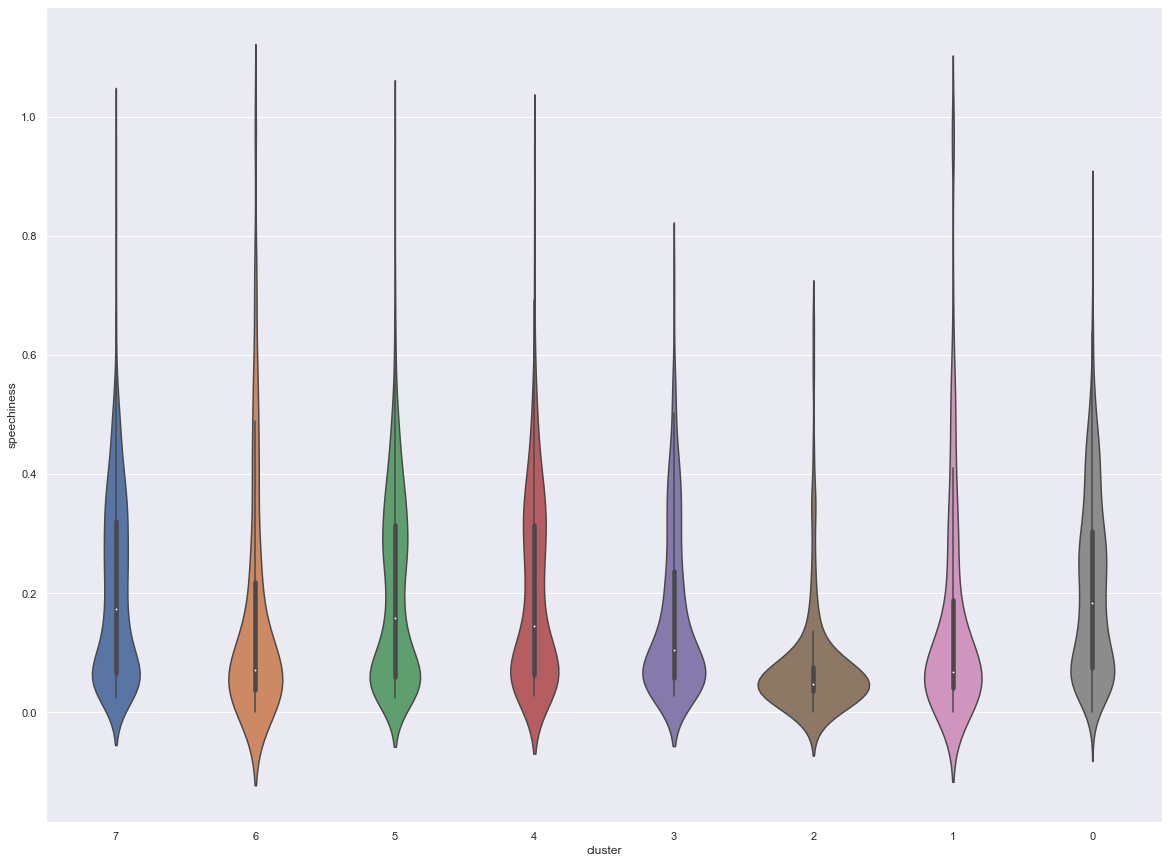

In [62]:
sns.set(style = "darkgrid")

my_order = df_std.groupby(by=["cluster"])["speechiness"].median().iloc[::-1].index


sns.violinplot(x = 'cluster', y = 'speechiness', data = df_std, order= my_order)

<AxesSubplot:xlabel='cluster', ylabel='energy'>

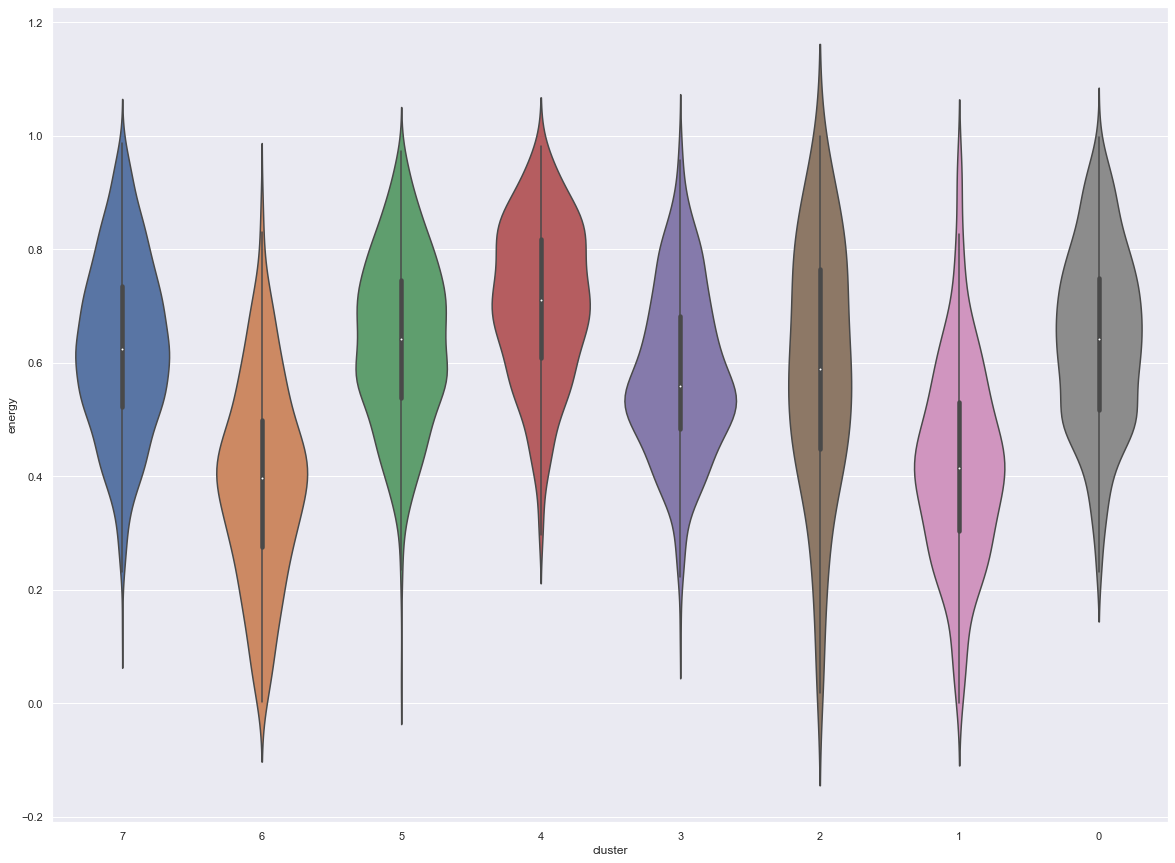

In [63]:
order = df_std.groupby(by=['cluster'])['energy'].mean().iloc[::-1].index


sns.violinplot(x = 'cluster', y = 'energy', data = df_std, order= order)

<AxesSubplot:xlabel='cluster', ylabel='acousticness'>

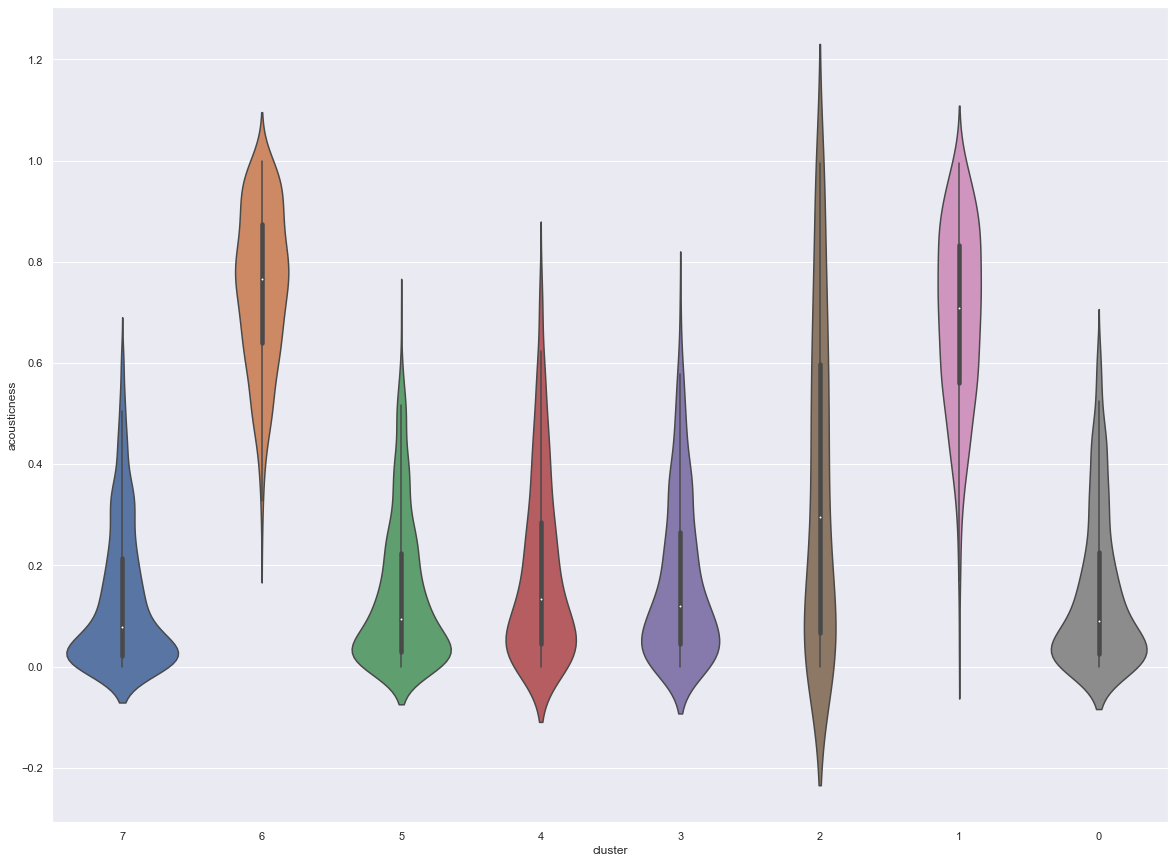

In [64]:
order = df_std.groupby(by=['cluster'])['acousticness'].mean().iloc[::-1].index


sns.violinplot(x = 'cluster', y = 'acousticness', data = df_std, order= order)

In [66]:
df_std[df_std["cluster"]== 9].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [67]:
df_std[df_std["cluster"]== 6].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000,367.000
mean,0.561,0.390,0.430,0.699,1.000,0.167,0.747,0.026,0.188,0.395,0.509,6.000,-14.946,-49.307
std,0.155,0.172,0.309,0.114,0.000,0.199,0.156,0.089,0.150,0.239,0.149,0.000,11.459,8.286
min,0.000,0.003,0.000,0.000,1.000,0.000,0.262,0.000,0.000,0.000,0.000,6.000,-57.574,-73.564
25%,0.470,0.276,0.182,0.648,1.000,0.038,0.640,0.000,0.106,0.214,0.395,6.000,-24.655,-55.320
50%,0.570,0.397,0.455,0.721,1.000,0.072,0.765,0.000,0.121,0.361,0.501,6.000,-14.557,-49.627
75%,0.669,0.498,0.636,0.775,1.000,0.220,0.876,0.005,0.211,0.534,0.603,6.000,-5.156,-43.000
max,0.903,0.881,1.000,0.903,1.000,1.000,1.000,0.723,0.959,0.985,1.000,6.000,11.288,-29.126


### Heirarchical Clustering - https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [73]:
from sklearn.cluster import AgglomerativeClustering

AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
hier_cluster = hier_cluster.fit_predict(liked_songs.drop(columns= ['name', "id"]))

In [75]:
hier_cluster

array([1, 0, 1, ..., 2, 9, 5])

In [77]:
clusters_df = df_std
clusters_df['hier_cluster'] = hier_cluster
clusters_df.head(10)

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords,hier_cluster
0,Millions,4GobDRbKnfjrA3KX5LhOwS,0.790,0.602,0.545,0.825,1.000,0.028,0.438,0.000,0.191,0.753,0.556,5,9.046,-30.760,1
1,Peloton,4NVBASz7a5QQ8X4XXJGxPl,0.654,0.602,0.545,0.788,0.000,0.057,0.003,0.000,0.390,0.183,0.454,3,18.485,55.007,0
2,drug dealer (feat. Lil Wayne),4Gm1VAxKdLS9aL7bkbZZyr,0.649,0.717,0.909,0.903,1.000,0.052,0.006,0.000,0.152,0.614,0.663,5,22.716,-35.821,1
3,Glow of Love - Satin Jackets Remix,6CcpfYyEOd8brQPyxhizEH,0.755,0.710,0.545,0.867,1.000,0.037,0.053,0.176,0.307,0.884,0.510,5,18.064,-22.029,6
4,Know You Miss Me,3AhTANwPh05IairsIXltRi,0.726,0.375,0.000,0.681,0.000,0.152,0.469,0.000,0.111,0.338,0.501,3,-1.959,75.061,3
5,Jordans,6vJ4Z2Hc5Bmm0sdqf9CtTR,0.782,0.414,0.636,0.718,1.000,0.193,0.805,0.288,0.147,0.870,0.403,6,-4.756,-39.765,2
6,Don’t Worry,3velQ2xk4VMEb5No5W3bkQ,0.635,0.835,0.091,0.830,0.000,0.088,0.212,0.949,0.108,0.434,0.552,4,-32.041,40.632,7
7,Back To Me,0gDFEmFuqFCb3k3GJ3x7aN,0.740,0.727,0.727,0.799,1.000,0.041,0.206,0.000,0.162,0.648,0.496,5,16.474,-30.175,1
8,my ex's best friend (with blackbear),7kDUspsoYfLkWnZR7qwHZl,0.749,0.674,0.455,0.866,0.000,0.045,0.005,0.000,0.142,0.304,0.579,3,20.658,49.543,0
9,Love Don't Cost a Thing (feat. Fat Joe) - RJ S...,4rblLT91sVtNHNi52yv1uG,0.805,0.943,0.182,0.855,1.000,0.138,0.018,0.000,0.210,0.789,0.473,7,-19.700,-4.826,5


<AxesSubplot:xlabel='hier_cluster', ylabel='acousticness'>

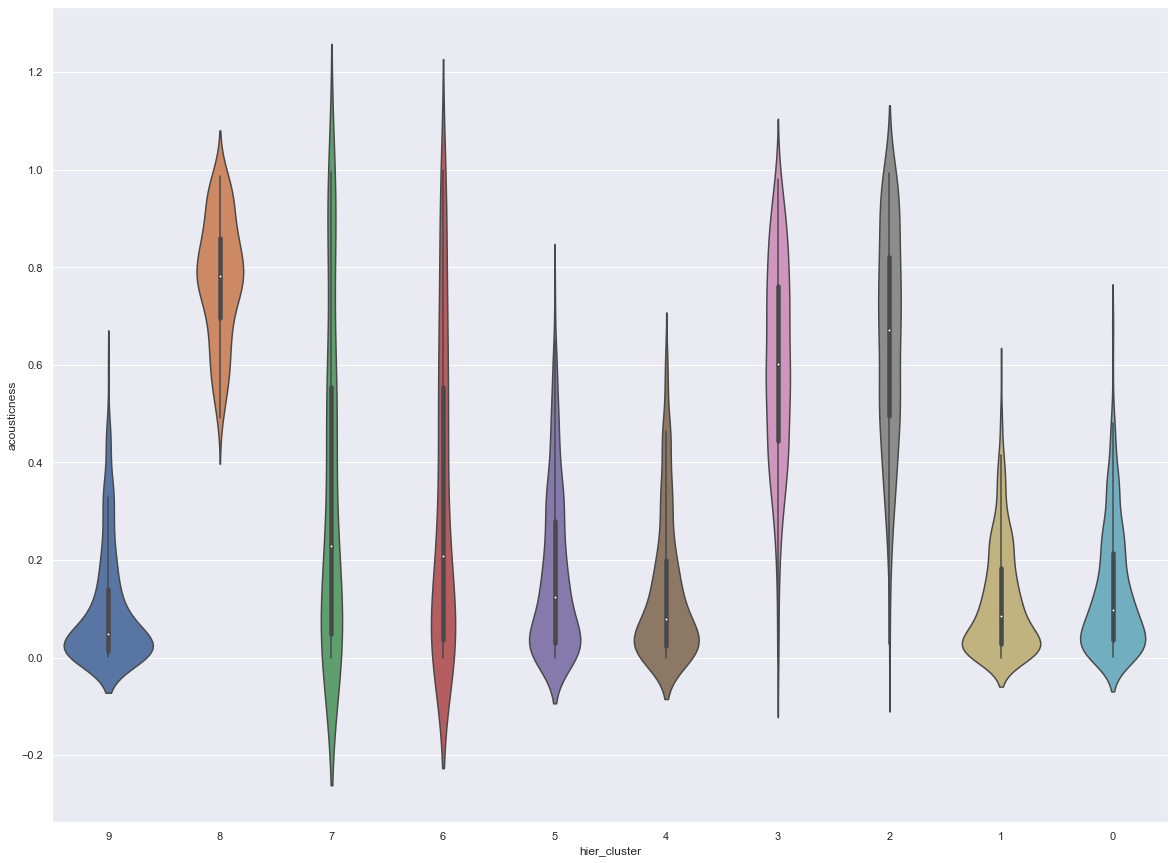

In [80]:
order = clusters_df.groupby(by=['hier_cluster'])['acousticness'].mean().iloc[::-1].index


sns.violinplot(x = 'hier_cluster', y = 'acousticness', data = clusters_df, order= order)

### K-Means on Unscaled Data

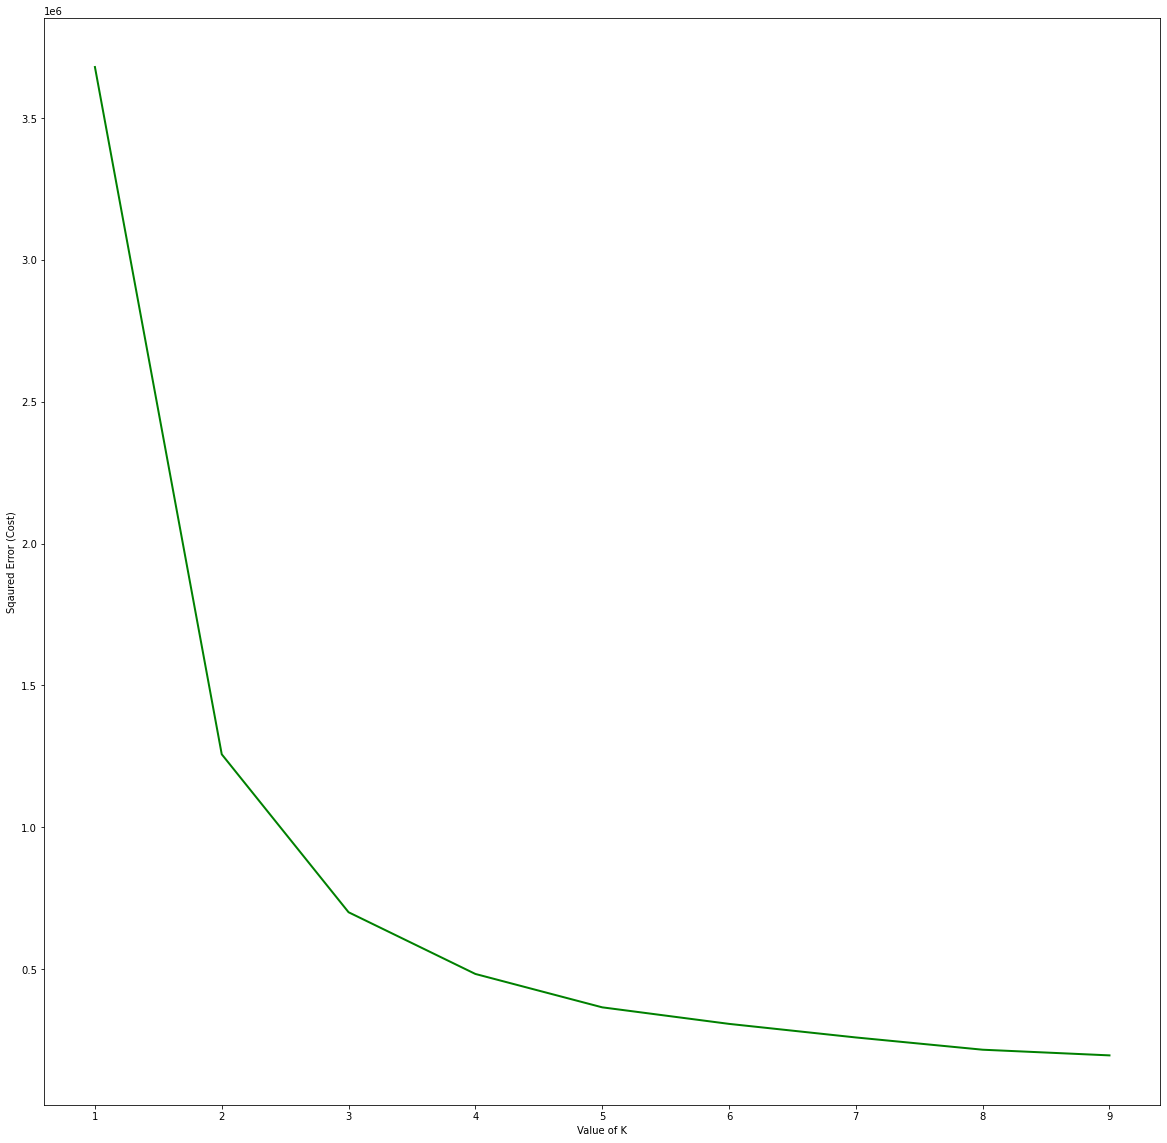

In [8]:
FEATURE_KEYS = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
K_MAX = 10

df=read_csv('liked_tracks_1650200513.csv')

cost = list()
for i in range(1, K_MAX):
    KM = KMeans(n_clusters = i, max_iter = 500, init= "random", n_init=10)
    KM.fit(df[FEATURE_KEYS])
    cost.append(KM.inertia_)

plt.plot(range(1, K_MAX), cost, color ='g', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show()

Optimal cluster is in the 3-5 range.

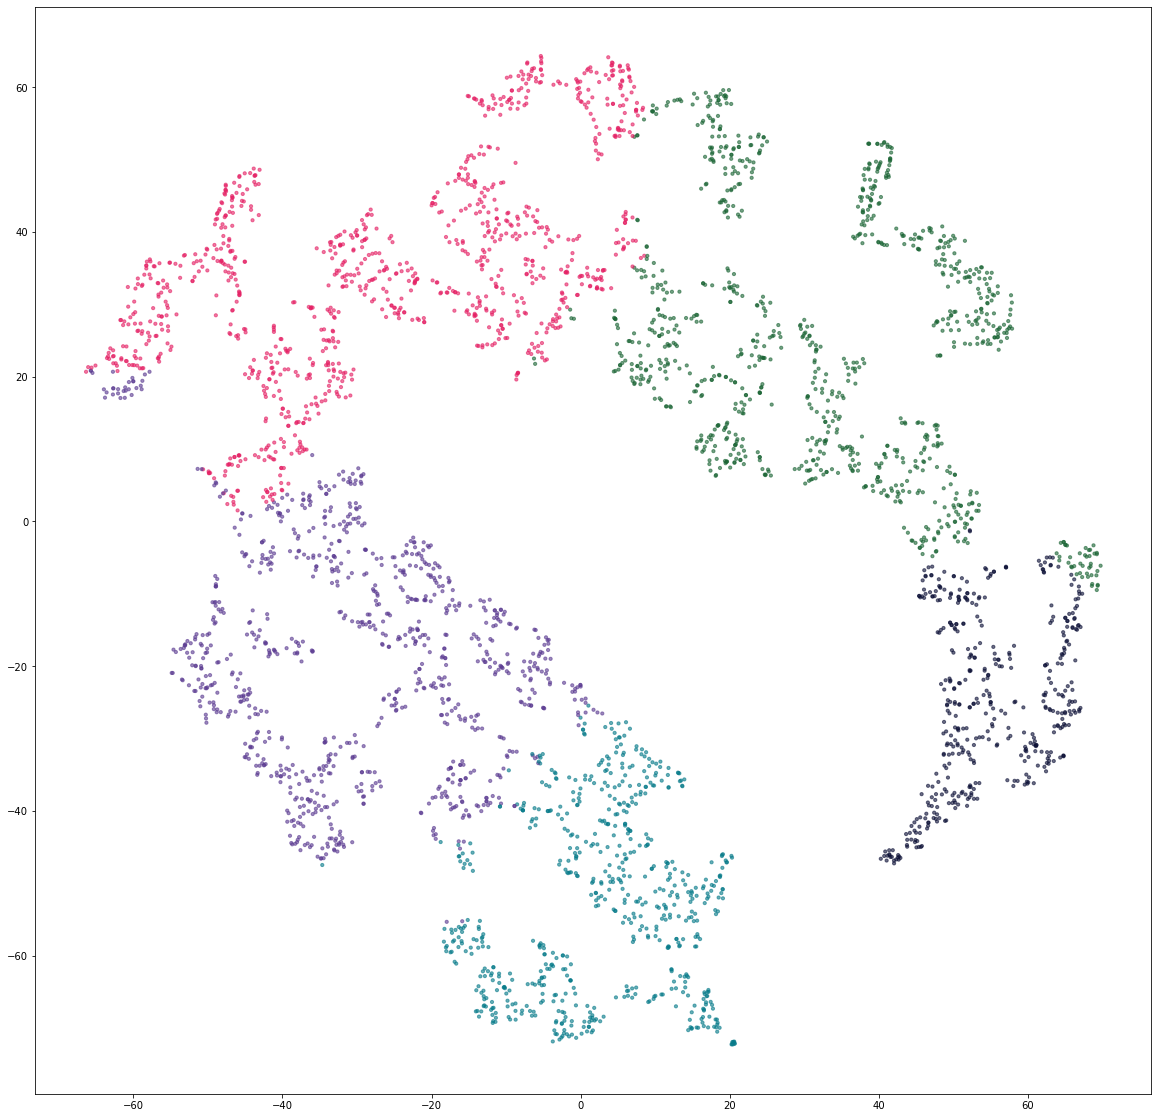

In [9]:
from sklearn.manifold import TSNE
import numpy as np

NUM_CLUSTERS = 5
TRACK_ADD_LIMIT = 100
COLORS = ['#e52165', '#0d1137', '#077b8a', '#5c3c92', '#1b6535']
COLOR_MAP = {0:COLORS[0], 1:COLORS[1], 2:COLORS[2], 3:COLORS[3], 4:COLORS[4]}
FEATURE_KEYS = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0)
df['cluster'] = kmeans.fit_predict(df[FEATURE_KEYS])
df['color'] = df.cluster.map(COLOR_MAP)

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(df[FEATURE_KEYS].values)
df['x_coords'] = Y[:, 0]
df['y_coords'] = Y[:, 1]
plt.scatter(df.x_coords, df.y_coords, c=df.color, alpha = 0.6, s=10)
plt.show()



In [10]:
df.cluster.value_counts()

0    1046
4     985
3     933
2     661
1     451
Name: cluster, dtype: int64

In [11]:
df[df["cluster"]== 0].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.0,1046.000000,1046.000000
mean,0.706302,0.595895,5.221797,-7.898496,0.550669,0.139710,0.251765,0.078037,0.192714,0.438509,121.094337,0.0,-25.813189,34.653248
std,0.156437,0.184972,3.771277,3.116201,0.497664,0.129126,0.270323,0.222410,0.148065,0.240406,6.345615,0.0,20.441044,14.334566
min,0.180000,0.029700,0.000000,-32.104000,0.000000,0.024900,0.000014,0.000000,0.027400,0.025500,109.698000,0.0,-66.345451,1.504555
25%,0.611250,0.473250,1.000000,-9.357750,0.000000,0.045900,0.036350,0.000000,0.102000,0.235000,116.057250,0.0,-43.734804,25.381156
50%,0.731000,0.596500,5.000000,-7.399000,1.000000,0.081000,0.136500,0.000011,0.128000,0.408000,120.436000,0.0,-26.810591,33.904474
75%,0.827000,0.728750,9.000000,-5.894500,1.000000,0.206000,0.402750,0.002772,0.241000,0.629000,126.449500,0.0,-8.312137,42.625156
max,0.976000,0.999000,11.000000,-0.804000,1.000000,0.935000,0.982000,0.973000,0.911000,0.965000,131.715000,0.0,8.526182,64.276237


In [12]:
df[df["cluster"]== 1].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000
mean,0.569792,0.633156,5.381375,-7.210324,0.567627,0.220563,0.230719,0.063190,0.204753,0.449390,171.138579,1.0,54.605976,-24.985868
std,0.165375,0.171243,3.679494,2.972529,0.495956,0.163562,0.257939,0.191073,0.157873,0.214807,11.232934,0.0,7.257504,11.747667
min,0.108000,0.030700,0.000000,-25.922000,0.000000,0.025100,0.000001,0.000000,0.041900,0.032200,156.906000,1.0,40.252090,-47.250988
25%,0.445000,0.521000,1.000000,-8.555000,0.000000,0.074850,0.027750,0.000000,0.102500,0.291000,161.764000,1.0,49.144806,-33.432203
50%,0.568000,0.651000,6.000000,-6.782000,1.000000,0.188000,0.130000,0.000006,0.136000,0.441000,169.994000,1.0,52.742943,-25.347195
75%,0.697500,0.752000,9.000000,-5.372000,1.000000,0.343500,0.353500,0.001285,0.267000,0.607000,176.343000,1.0,62.127592,-14.415219
max,0.885000,0.973000,11.000000,-1.520000,1.000000,0.916000,0.975000,0.935000,0.970000,0.981000,215.669000,1.0,67.266838,-1.238421


In [13]:
df[df["cluster"]== 2].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.0,661.000000,661.000000
mean,0.576820,0.553903,5.232980,-8.451038,0.558245,0.209208,0.340122,0.064789,0.220641,0.412682,77.511849,2.0,2.791569,-52.853970
std,0.178855,0.203484,3.617743,4.113965,0.496972,0.172154,0.309148,0.208194,0.173476,0.228030,11.536431,0.0,10.248798,12.356792
min,0.000000,0.004100,0.000000,-34.475000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,2.0,-34.662033,-72.258522
25%,0.465000,0.415000,1.000000,-10.244000,0.000000,0.056500,0.060800,0.000000,0.108000,0.231000,75.978000,2.0,-4.406261,-64.407486
50%,0.589000,0.566000,5.000000,-7.549000,1.000000,0.167000,0.250000,0.000002,0.152000,0.399000,79.990000,2.0,3.766584,-53.259392
75%,0.707000,0.712000,8.000000,-5.847000,1.000000,0.323000,0.579000,0.000456,0.282000,0.579000,82.944000,2.0,11.168996,-42.740421
max,0.902000,0.997000,11.000000,-0.606000,1.000000,0.954000,0.992000,0.971000,0.960000,0.966000,88.118000,2.0,20.663162,-25.460115


In [14]:
df[df["cluster"]== 3].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000
mean,0.677274,0.605493,5.037513,-7.814514,0.563773,0.177960,0.259790,0.047020,0.216055,0.453915,98.219897,3.0,-29.857010,-18.980240
std,0.160724,0.177459,3.585211,3.324205,0.496182,0.160438,0.257845,0.158320,0.171167,0.235828,6.026064,0.0,14.645062,15.202329
min,0.140000,0.007220,0.000000,-28.194000,0.000000,0.022800,0.000027,0.000000,0.022400,0.032600,87.832000,3.0,-65.713593,-55.328072
25%,0.570000,0.488000,1.000000,-9.319000,0.000000,0.048900,0.046600,0.000000,0.103000,0.260000,93.004000,3.0,-40.776226,-31.246344
50%,0.696000,0.613000,5.000000,-7.269000,1.000000,0.121000,0.164000,0.000004,0.140000,0.448000,97.965000,3.0,-30.897062,-18.962387
75%,0.800000,0.735000,8.000000,-5.753000,1.000000,0.276000,0.411000,0.001250,0.293000,0.637000,103.200000,3.0,-18.231749,-7.778582
max,0.970000,0.987000,11.000000,-1.551000,1.000000,0.935000,0.996000,0.945000,0.992000,0.979000,109.505000,3.0,2.897888,20.825344


In [15]:
df[df["cluster"]== 4].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,x_coords,y_coords
count,985.000000,985.000000,985.00000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.000000,985.000000
mean,0.694741,0.591789,4.84264,-7.531327,0.588832,0.186969,0.206482,0.052656,0.196206,0.429426,142.462935,4.0,32.876652,24.504425
std,0.165995,0.159862,3.75015,2.803475,0.492295,0.143481,0.239052,0.180524,0.147110,0.227007,6.750181,0.0,16.597773,17.419271
min,0.125000,0.066400,0.00000,-25.149000,0.000000,0.023800,0.000013,0.000000,0.038600,0.037100,131.895000,4.0,-6.260826,-9.490929
25%,0.594000,0.488000,1.00000,-8.811000,0.000000,0.057500,0.026500,0.000000,0.105000,0.243000,136.892000,4.0,19.284475,10.073482
50%,0.725000,0.588000,5.00000,-7.208000,1.000000,0.148000,0.112000,0.000001,0.134000,0.411000,140.712000,4.0,32.812061,24.308529
75%,0.824000,0.706000,8.00000,-5.653000,1.000000,0.285000,0.299000,0.000295,0.241000,0.594000,147.955000,4.0,47.077282,37.851219
max,0.953000,0.981000,11.00000,-0.777000,1.000000,0.941000,0.992000,0.971000,0.942000,0.963000,156.278000,4.0,69.735596,59.573669


In [16]:

import spotipy
from spotipy.oauth2 import SpotifyOAuth
from creds import client_id, client_secret

redirect_uri = 'https://example.com/callback'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope="playlist-modify-public"))
user_id = sp.current_user()['id']

g=df.groupby('cluster')

def get_windowed_track_ids(track_ids, limit):
    for i in range(0, len(track_ids), limit): 
        track_window = track_ids[i:i + limit]
        yield track_window

for cluster in range(NUM_CLUSTERS):
    _cluster_name = f'auto_cluster_{cluster}' 
    playlist_id = sp.user_playlist_create(user_id, _cluster_name)['id']
    print(f'Created playlist {_cluster_name}')
    for _tracks in get_windowed_track_ids(list(g.get_group(cluster)['id']), TRACK_ADD_LIMIT):
        sp.playlist_add_items(playlist_id, _tracks)
        print(f'Added {len(_tracks)} tracks to playlist {_cluster_name}')
view rawidentify_clusters_and_create_playlists.py hosted with ❤ by GitHub

SyntaxError: invalid syntax (<ipython-input-16-1ba14d7f5bb9>, line 27)

#### Visualize cluster differences -- acousticness, speechiness, danceability etc
http://ben-tanen.com/notebooks/kmeans-music.html     https://github.com/ben-tanen/kmeans-music/blob/master/kmeans-music.py
https://sampurkiss.github.io/spotify-playlists.html

In [ ]:
df_std["art"]